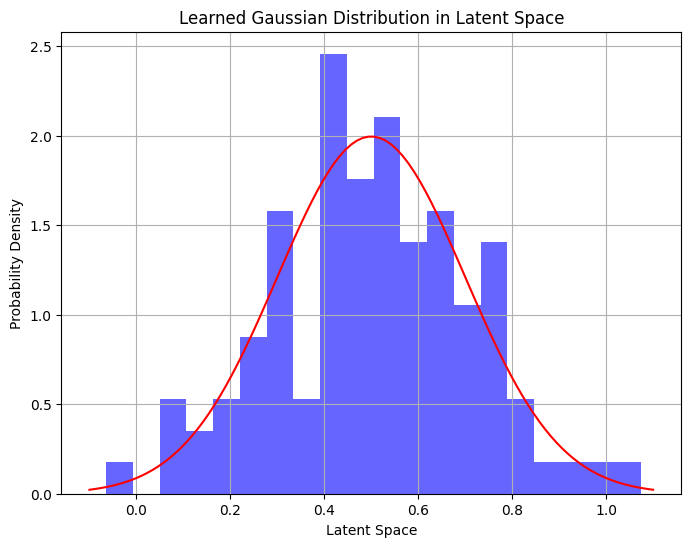

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Learned parameters of the latent space
mu = 0.5
sigma = 0.2

# Number of samples to generate
num_samples = 100

# Sampling from the Gaussian distribution
latent_samples = np.random.normal(mu, sigma, num_samples)

# Visualizing the latent space
plt.figure(figsize=(8, 6))
plt.hist(latent_samples, bins=20, density=True, alpha=0.6, color='b')

# Plotting the learned Gaussian distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='r')

plt.xlabel('Latent Space')
plt.ylabel('Probability Density')
plt.title('Learned Gaussian Distribution in Latent Space')
plt.grid(True)
plt.show()


Sure, let's illustrate the concept of latent space and latent representation using numerical examples.

Let's consider a simplified scenario where our latent space is one-dimensional for easier visualization. In reality, the latent space can have multiple dimensions, but for this example, we'll stick to one dimension.

**Example: Latent Space and Latent Representation**

Suppose we have a Variational Autoencoder (VAE) trained on a dataset of images. After training, the VAE has learned a latent space with a mean (\( \mu \)) and a standard deviation (\( \sigma \)).

Let's say the learned parameters of the latent space are as follows:
- Mean (\( \mu \)): 0.5
- Standard Deviation (\( \sigma \)): 0.2

Now, let's generate some latent representations by sampling from this learned Gaussian distribution in the latent space.

1. **Sampling from the Gaussian distribution**: We'll sample several points (\( z \)) from the Gaussian distribution with mean (\( \mu \)) and standard deviation (\( \sigma \)).

2. **Decoding**: We'll then decode these sampled latent representations to generate corresponding data points (e.g., images).

In [3]:
import numpy as np

# Selecting two latent representations
z1 = np.array([0.2])  # Example latent representation 1
z2 = np.array([0.8])  # Example latent representation 2

# Generating intermediate points (linear interpolation)
num_interpolations = 5
interpolated_points = []
for i in range(num_interpolations + 2):  # +2 to include z1 and z2
    lambda_i = i / (num_interpolations + 1)
    interpolated_point = (1 - lambda_i) * z1 + lambda_i * z2
    interpolated_points.append(interpolated_point)

In [4]:
interpolated_points

[array([0.2]),
 array([0.3]),
 array([0.4]),
 array([0.5]),
 array([0.6]),
 array([0.7]),
 array([0.8])]

In [7]:
import numpy as np

# Distribution Trick: Sampling from a Gaussian distribution
def sample_from_gaussian(mu, sigma, num_samples):
    return np.random.normal(mu, sigma, num_samples)

# Reparameterization Trick
def reparameterize(mu, sigma, num_samples):
    mu = np.array(mu)  # Ensure mu is converted to a numpy array
    epsilon = np.random.normal(0, 1, (num_samples,) + mu.shape)  # Sample noise from standard Gaussian
    return mu + sigma * epsilon

# Example usage
mu = 0.5
sigma = 0.2
num_samples = 10

# Distribution Trick: Sampling from a Gaussian distribution
latent_samples = sample_from_gaussian(mu, sigma, num_samples)
print("Samples from Gaussian distribution:", latent_samples)

# Reparameterization Trick
latent_samples_reparam = reparameterize(mu, sigma, num_samples)
print("Samples using reparameterization trick:", latent_samples_reparam)


Samples from Gaussian distribution: [0.76653743 0.40758755 1.12270929 0.56687334 0.45710731 0.36023892
 0.30457034 0.26183152 0.33822642 0.25708001]
Samples using reparameterization trick: [0.87558539 0.77581132 0.65930378 0.93936547 0.62806146 0.32418297
 0.63940544 0.59982511 0.54617679 0.69561425]


In [8]:
import numpy as np

# Distribution Trick: Sampling from a Gaussian distribution
def sample_from_gaussian(mu, sigma, num_samples):
    return np.random.normal(mu, sigma, num_samples)

# Reparameterization Trick
def reparameterize(mu, sigma, num_samples):
    mu = np.array(mu)  # Ensure mu is converted to a numpy array
    epsilon = np.random.normal(0, 1, (num_samples,) + mu.shape)  # Sample noise from standard Gaussian
    return mu + sigma * epsilon

# KL Divergence between two Gaussian distributions
def kl_divergence(mu_q, sigma_q, mu_p, sigma_p):
    kl = np.log(sigma_p / sigma_q) + (sigma_q**2 + (mu_q - mu_p)**2) / (2 * sigma_p**2) - 0.5
    return np.sum(kl)

# Example usage
mu_q = 0.5
sigma_q = 0.2
mu_p = 0.6
sigma_p = 0.3
num_samples = 1000

# Distribution Trick: Sampling from a Gaussian distribution
latent_samples = sample_from_gaussian(mu_q, sigma_q, num_samples)

# Reparameterization Trick
latent_samples_reparam = reparameterize(mu_q, sigma_q, num_samples)

# KL Divergence
kl_value = kl_divergence(mu_q, sigma_q, mu_p, sigma_p)
print("KL Divergence:", kl_value)


KL Divergence: 0.18324288588594206


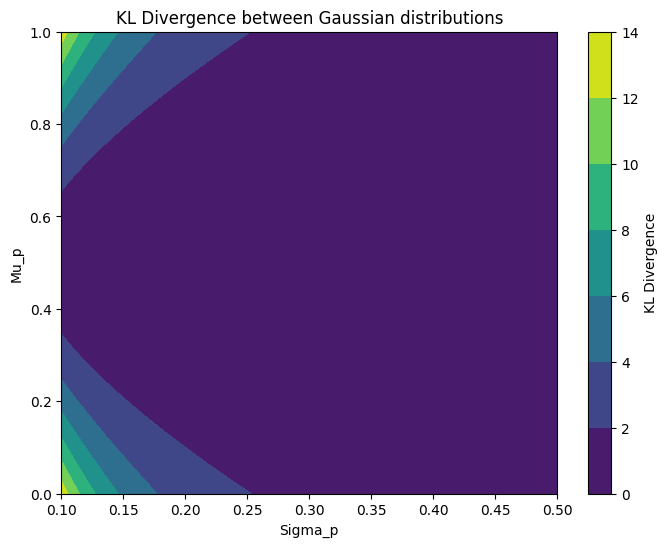

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# KL Divergence between two Gaussian distributions
def kl_divergence(mu_q, sigma_q, mu_p, sigma_p):
    kl = np.log(sigma_p / sigma_q) + (sigma_q**2 + (mu_q - mu_p)**2) / (2 * sigma_p**2) - 0.5
    return np.sum(kl)

# Range of values for mu_p and sigma_p
mu_p_range = np.linspace(0, 1, 100)
sigma_p_range = np.linspace(0.1, 0.5, 100)

# Compute KL divergence for each combination of mu_p and sigma_p
kl_values = np.zeros((len(mu_p_range), len(sigma_p_range)))
for i, mu_p in enumerate(mu_p_range):
    for j, sigma_p in enumerate(sigma_p_range):
        kl_values[i, j] = kl_divergence(mu_q, sigma_q, mu_p, sigma_p)

# Plot KL divergence
plt.figure(figsize=(8, 6))
plt.contourf(sigma_p_range, mu_p_range, kl_values, cmap='viridis')
plt.colorbar(label='KL Divergence')
plt.xlabel('Sigma_p')
plt.ylabel('Mu_p')
plt.title('KL Divergence between Gaussian distributions')
plt.show()
